Word cloud 는 keywords 를 시각화하여 표현하는 좋은 수단입니다. Python 의 wordcloud package 를 이용하여 KR-WordRank 의 결과를 표현합니다. 

Package, wordcloud 의 사용법은 [여기][wordcloud]를 참고하세요. wordcloud 의 설치는 pip install 이 가능합니다. 

    pip install wordcloud

KR-WordRank 에 관련한 내용과 사용의 자세한 설명은 이 [튜토리얼][krwordrank_tutorial]을 참고하세요. 

[wordcloud]: https://github.com/amueller/word_cloud
[krwordrank_tutorial]: https://github.com/lovit/KR-WordRank/blob/master/tutorials/krwordrank_word_and_keyword_extraction.ipynb

In [1]:
import config
import krwordrank
from krwordrank.word import KRWordRank
from navermovie_comments import load_movie_comments

idxs, texts, rates = load_movie_comments(idxs='134963')
print(krwordrank.__version__)

soynlp=0.0.493
added lovit_textmining_dataset
1.0.1


In [2]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, num_keywords=300, verbose=True)

scan vocabs ... 
num vocabs = 15129
done = 10 Early stopped.


In [3]:
# Check top 30 keywords with corresponding score

for word, r in sorted(keywords.items(), key=lambda x:-x[1])[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	230.3272
     관람객:	112.9117
      너무:	78.6762
      음악:	37.7102
      정말:	37.2943
     마지막:	35.1102
      최고:	22.4884
      사랑:	21.1817
     뮤지컬:	20.7810
      꿈을:	19.5622
      보고:	19.4422
     여운이:	19.4412
      아름:	18.6860
      진짜:	18.5991
      영상:	18.1566
      좋았:	17.9096
      노래:	16.9428
     스토리:	16.2458
      좋은:	15.5067
      그냥:	15.2163
      현실:	15.1047
      생각:	14.6701
      인생:	14.2914
      좋고:	13.9802
      지루:	13.9062
      다시:	13.8138
      감동:	13.5138
      느낌:	12.2763
      ㅠㅠ:	12.1908
      좋아:	11.9646


In [4]:
# remove stopwords

stopwords = {'영화', '관람객', '너무', '정말', '보고'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

print('num passwords = {}'.format(len(passwords)))

num passwords = 295


In [5]:
# draw word cloud using generate_from_frequencies()
# You should set font path for Korean.

from wordcloud import WordCloud

# Set your font path
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

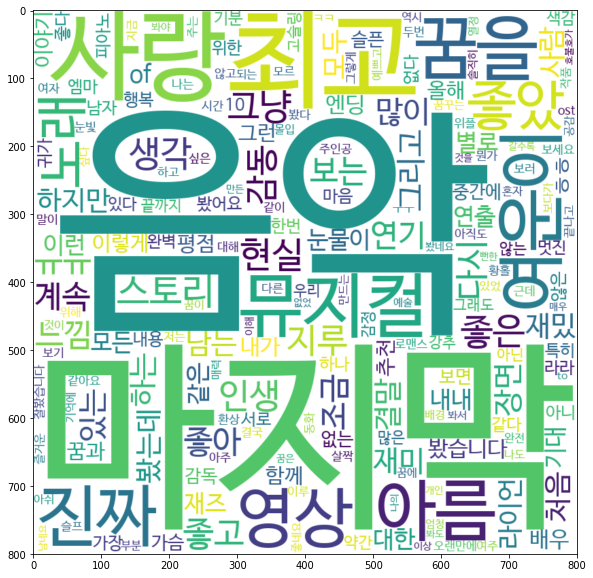

In [6]:
# show figure using matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [7]:
from krwordrank.sentence import summarize_with_sentences

keywords, sents = summarize_with_sentences(
    texts, num_keywords=100, num_keysents=5, diversity=0.5)

for sent in sents:
    print(sent, end='\n\n')

관람객오랜만에 좋은 영화봤다는 생각들었구요 음악도 영상도 스토리도 너무나좋았고 무엇보다 진한 여운이 남는 영화는 정말 오랜만이었어요 연인끼리 가서 보기 정말 좋은영화 너뮤너뮤너뮤 재밌게 잘 봤습니다

관람객처음엔 초딩들 보는 그냥 그런영화인줄 알았는데 정말로 눈과 귀가 즐거운 영화였습니다 어찌보면 뻔한 스토리일지 몰라도 그냥 보고 듣는게 즐거운 그러다가 정말 마지막엔 너무 아름답고 슬픈 음악이 되어버린

관람객아 너무너무 보고싶었던영화재미도 있고 울컥울컥 감동적이었어요피아노에 푹 빠지게 만든 라이언고슬링과사랑스러웠던 엠마스톤 최고 음악과 노래가 계속 생각나구요결말도

관람객느낌과 기분을 이해하기 쉽게 음악의 비트 속도로 춤으로 노래의 톤으로 보여주는게 뮤지컬 영화의 맛 아닐까 싶다 내내 잔잔히 즐거웠다 다만 너무 현실적이게도 끝이 씁쓸했다 약간의 시간이 지나고서야 둘의 마지막 미소를 비로소 공감되는것 같았다

관람객인생영화다 노래도 너무 좋고 배우 소품 배경 장면들 하나하나 맘에 안 드는게 없다 ㅠㅠ 특히 마지막 셉OO에서의 내용은 진짜 잊을 수가 없을 거같다 보고나면 먹먹하고 안타까운 느낌이 드는데 그래도 황홀하고 아름다운 영화다

